In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
import numpy as np
import h5py

In [103]:
filename = './extradatasets/ASCAD_desync50.h5'

In [104]:
def load_ascad(file_path, num_traces=10):
    with h5py.File(file_path, 'r') as f:
        X_profiling = np.array(f['Profiling_traces/traces'])[:num_traces]
        Y_profiling = np.array(f['Profiling_traces/labels'])[:num_traces]
        X_attack = np.array(f['Attack_traces/traces'])[:num_traces]
        Y_attack = np.array(f['Attack_traces/labels'])[:num_traces]
        
        metadata_attack = f['Attack_traces/metadata']
        plaintexts_attack = np.array(metadata_attack['plaintext'])
        key = np.array(metadata_attack['key'])
    
    return (X_profiling, Y_profiling), (X_attack, Y_attack), plaintexts_attack, key

(6, 700, 700)


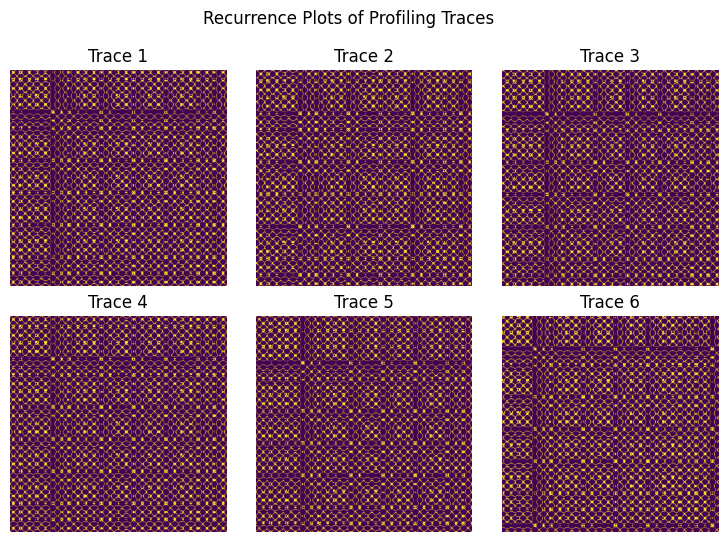

In [105]:
rp = RecurrencePlot(threshold='point', percentage=20)
(X_profiling, Y_profiling), (X_attack, Y_attack), plaintexts_attack, key = load_ascad(filename, num_traces=6)

trace_rp = rp.fit_transform(X_profiling)

print(trace_rp.shape)

fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.3)
for i in range(6):
    grid[i].imshow(trace_rp[i], aspect='auto')
    grid[i].set_title(f'Trace {i+1}')
    grid[i].axis('off')
plt.suptitle('Recurrence Plots of Profiling Traces')

plt.show()